# Analyse de Portefeuille avec PyFolio

In [1]:
import pyfolio as pf
import matplotlib.pyplot as plt
import empyrical

## Définir un algorithmique de benchmark pour SPY

In [2]:
def initialize(context):
    context.spy = sid(8554)

    
    set_max_leverage(1.01)
    
    schedule_function(rebalance,date_rules.every_day(),time_rules.market_open())
    
def rebalance(context,data):
    order_target_percent(context.spy,1)

In [3]:
# Obtenir les rendements du benchmark
benchmark_rets = get_backtest('5ea05f494e836745cf5adb9f')

100% Time:  0:00:02|##########################################################|


In [4]:
bm_returns = benchmark_rets.daily_performance['returns']
bm_positions = benchmark_rets.pyfolio_positions
bm_transactions = benchmark_rets.pyfolio_transactions

### Utiliser l'algorithme de la vidéo 'Effet de Levier'

In [5]:
# Utiliser le même algorithme que la vidéo 'Effet de Levier'
bt = get_backtest('5ea0559950e04245b1a90ff4')

100% Time:  0:00:00|##########################################################|


In [6]:
bt_returns = bt.daily_performance['returns']
bt_positions = bt.pyfolio_positions
bt_transactions = bt.pyfolio_transactions

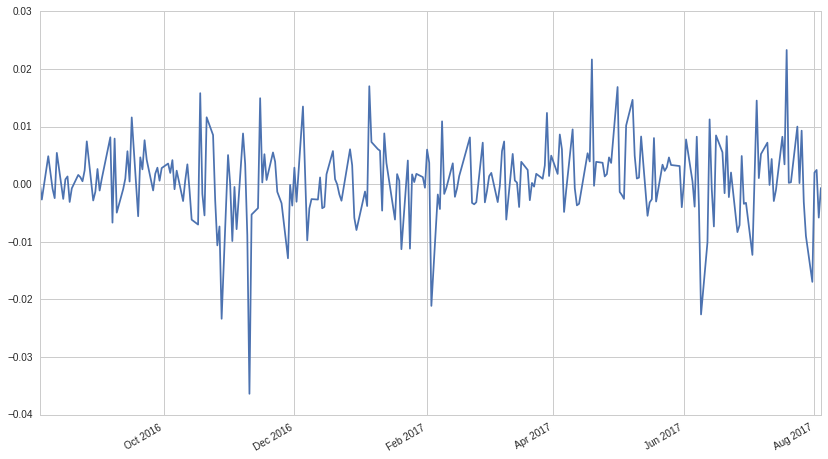

In [7]:
bt_returns.plot()

In [8]:
empyrical.beta(bt_returns,bm_returns)

0.14140644478845052

# Graphiques PyFolio

In [9]:
benchmark_rets = bm_returns

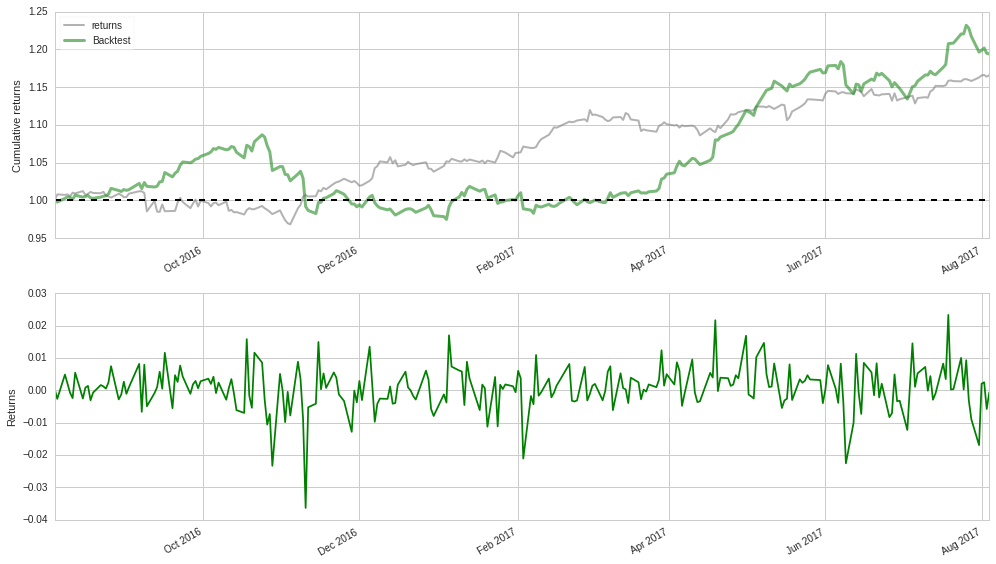

In [10]:
# Rendements cumulés
plt.subplot(2,1,1)
pf.plotting.plot_rolling_returns(bt_returns, benchmark_rets)

# Rendements non cumulés, quotidiens
plt.subplot(2,1,2)
pf.plotting.plot_returns(bt_returns)
plt.tight_layout()

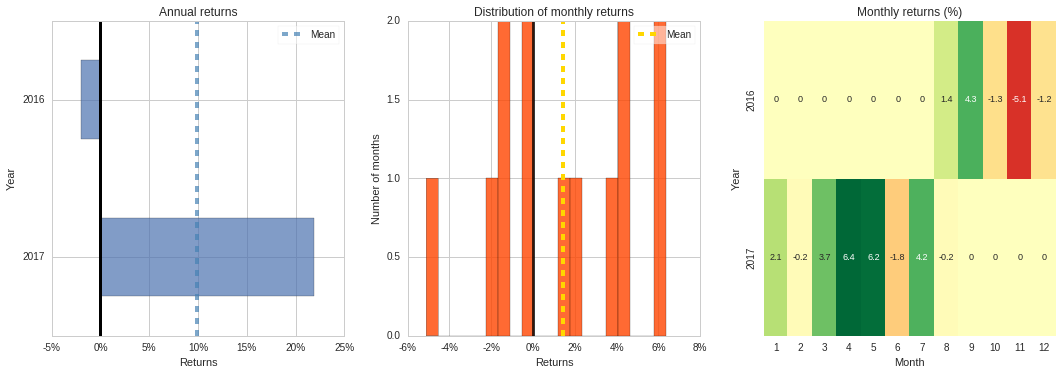

In [11]:
fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(15,5)

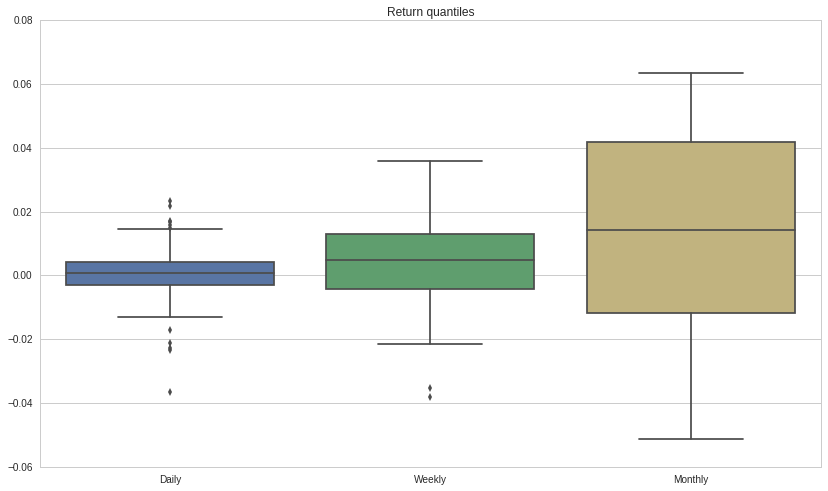

In [12]:
pf.plot_return_quantiles(bt_returns);

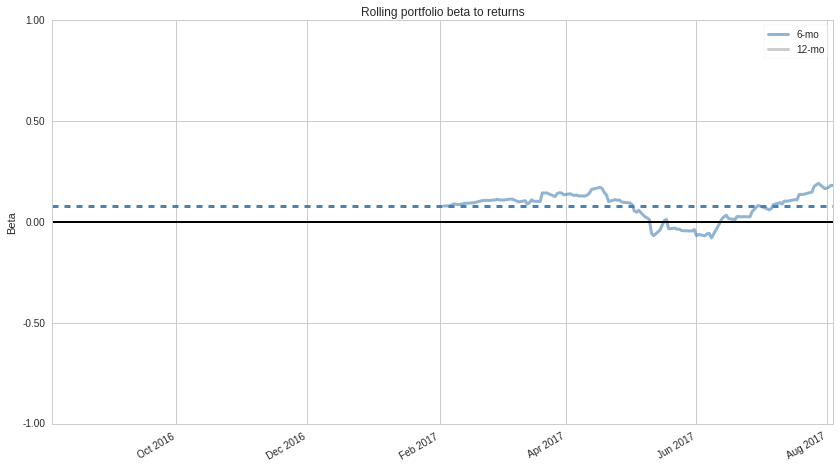

In [13]:
pf.plot_rolling_beta(bt_returns, benchmark_rets);

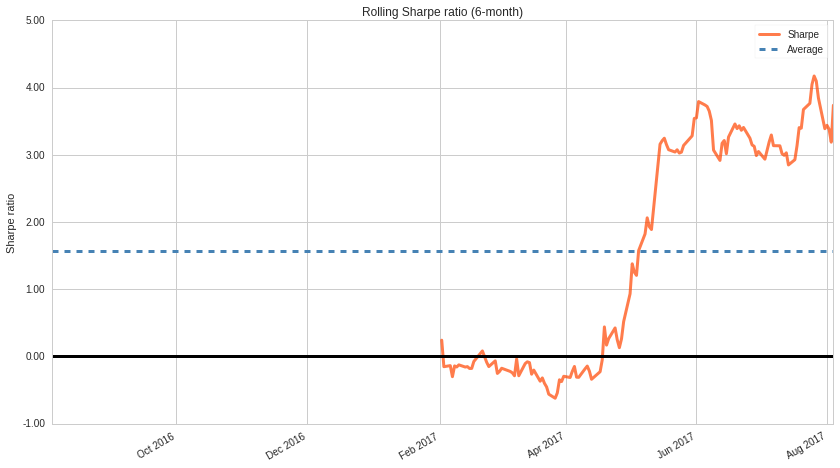

In [14]:
pf.plot_rolling_sharpe(bt_returns);

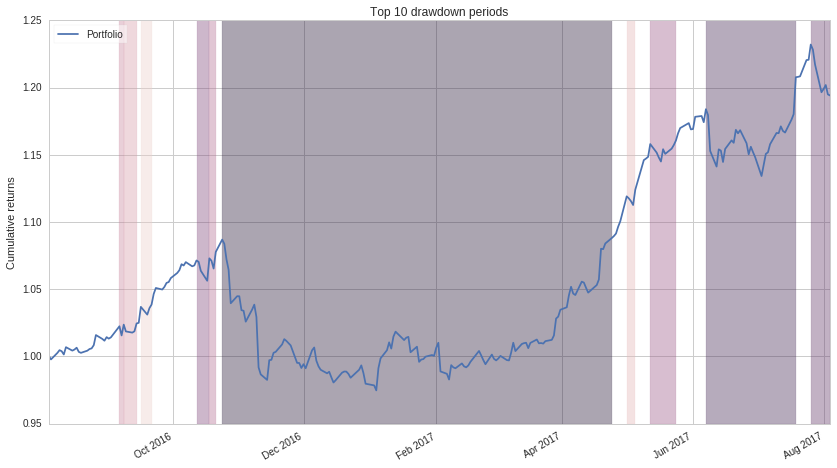

In [15]:
pf.plot_drawdown_periods(bt_returns);

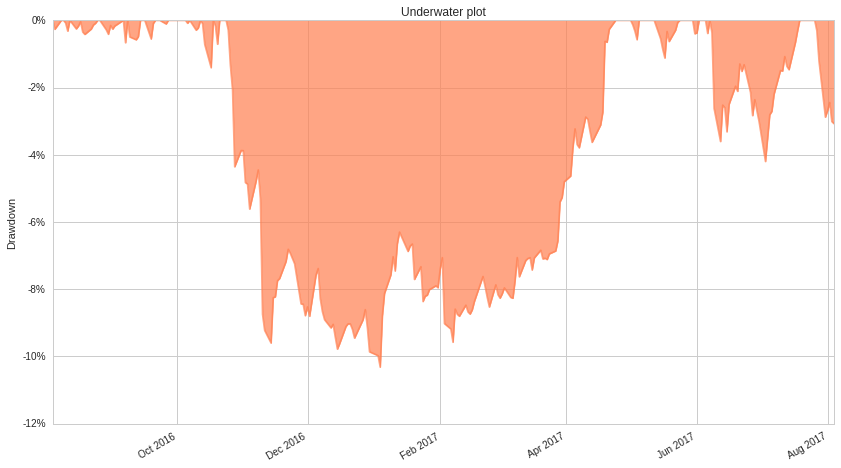

In [16]:
pf.plot_drawdown_underwater(bt_returns);

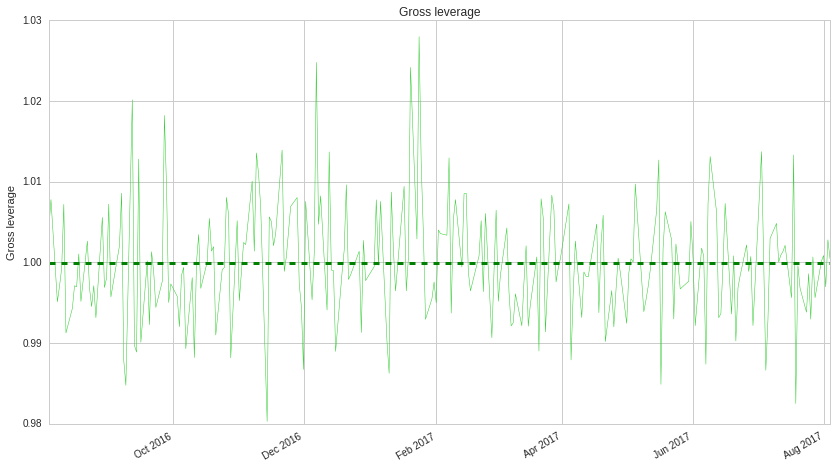

In [17]:
pf.plot_gross_leverage(bt_returns, bt_positions);

Top 10 long positions of all time,max
AMZN-16841,50.99%


Top 10 short positions of all time,max
IBM-3766,-52.04%


Top 10 positions of all time,max
IBM-3766,52.04%
AMZN-16841,50.99%


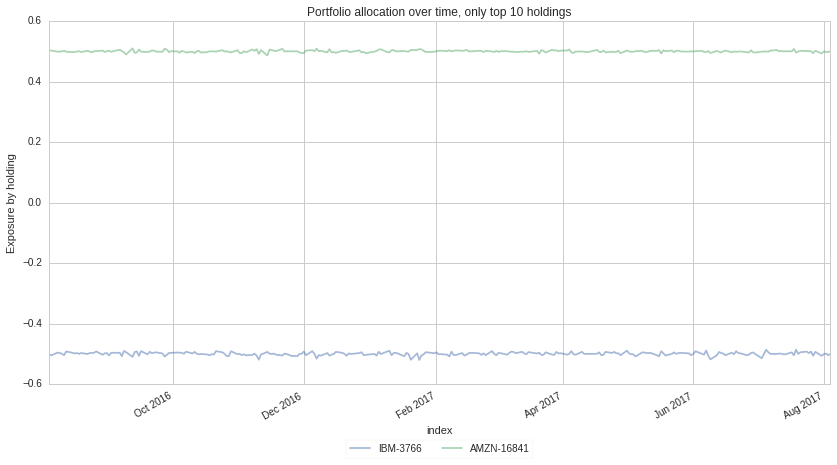

In [18]:
pos_percent = pf.pos.get_percent_alloc(bt_positions)
pf.plotting.show_and_plot_top_positions(bt_returns, pos_percent);

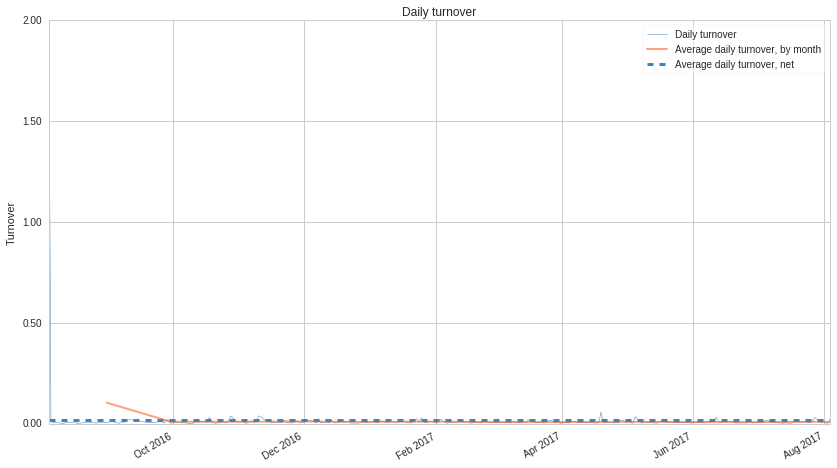

In [19]:
pf.plot_turnover(bt_returns, bt_transactions, bt_positions);

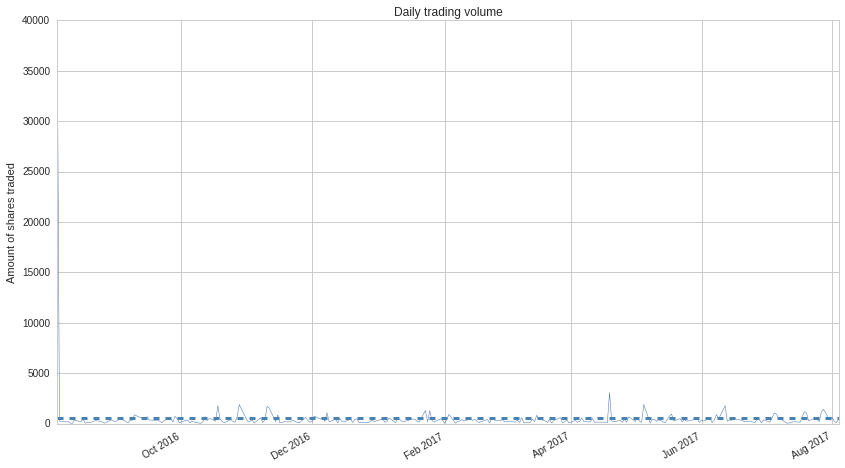

In [21]:
pf.plotting.plot_daily_volume(bt_returns, bt_transactions);

Summary stats,All trades,Short trades,Long trades
Total number of round_trips,250.00,109.00,141.00
Percent profitable,0.74,0.45,0.97
Winning round_trips,186.00,49.00,137.00
Losing round_trips,64.00,60.00,4.00
Even round_trips,0.00,0.00,0.00


PnL stats,All trades,Short trades,Long trades
Total profit,$1980690.67,$526009.56,$1454681.10
Gross profit,$2152761.28,$695137.94,$1457623.34
Gross loss,$-172070.61,$-169128.38,$-2942.23
Profit factor,$12.51,$4.11,$495.41
Avg. trade net profit,$7922.76,$4825.78,$10316.89
Avg. winning trade,$11573.99,$14186.49,$10639.59
Avg. losing trade,$-2688.60,$-2818.81,$-735.56
Ratio Avg. Win:Avg. Loss,$4.30,$5.03,$14.46
Largest winning trade,$999650.80,$590207.58,$999650.80
Largest losing trade,$-18940.73,$-18940.73,$-1177.78


Duration stats,All trades,Short trades,Long trades
Avg duration,179 days 00:14:59.524000,168 days 03:03:18.165137,187 days 10:09:59.156028
Median duration,181 days 01:00:00,167 days 01:00:00,189 days 01:00:00
Longest duration,364 days 10:28:01,317 days 00:00:00,364 days 10:28:01
Shortest duration,0 days 13:31:59,0 days 13:31:59,1 days 00:00:00


Return stats,All trades,Short trades,Long trades
Avg returns all round_trips,0.07%,0.15%,0.00%
Avg returns winning,0.10%,0.19%,0.02%
Avg returns losing,-0.03%,-0.03%,-0.03%
Median returns all round_trips,0.01%,0.02%,0.00%
Median returns winning,0.02%,0.03%,0.01%
Median returns losing,-0.01%,-0.02%,-0.01%
Largest winning trade,8.37%,8.37%,0.10%
Largest losing trade,-0.19%,-0.13%,-0.19%


Symbol stats,AMZN-16841,IBM-3766
Avg returns all round_trips,0.00%,0.15%
Avg returns winning,0.02%,0.19%
Avg returns losing,-0.03%,-0.03%
Median returns all round_trips,0.00%,0.02%
Median returns winning,0.01%,0.03%
Median returns losing,-0.01%,-0.02%
Largest winning trade,0.10%,8.37%
Largest losing trade,-0.19%,-0.13%


Profitability (PnL / PnL total) per name,
AMZN-16841,73.44%
IBM-3766,26.56%


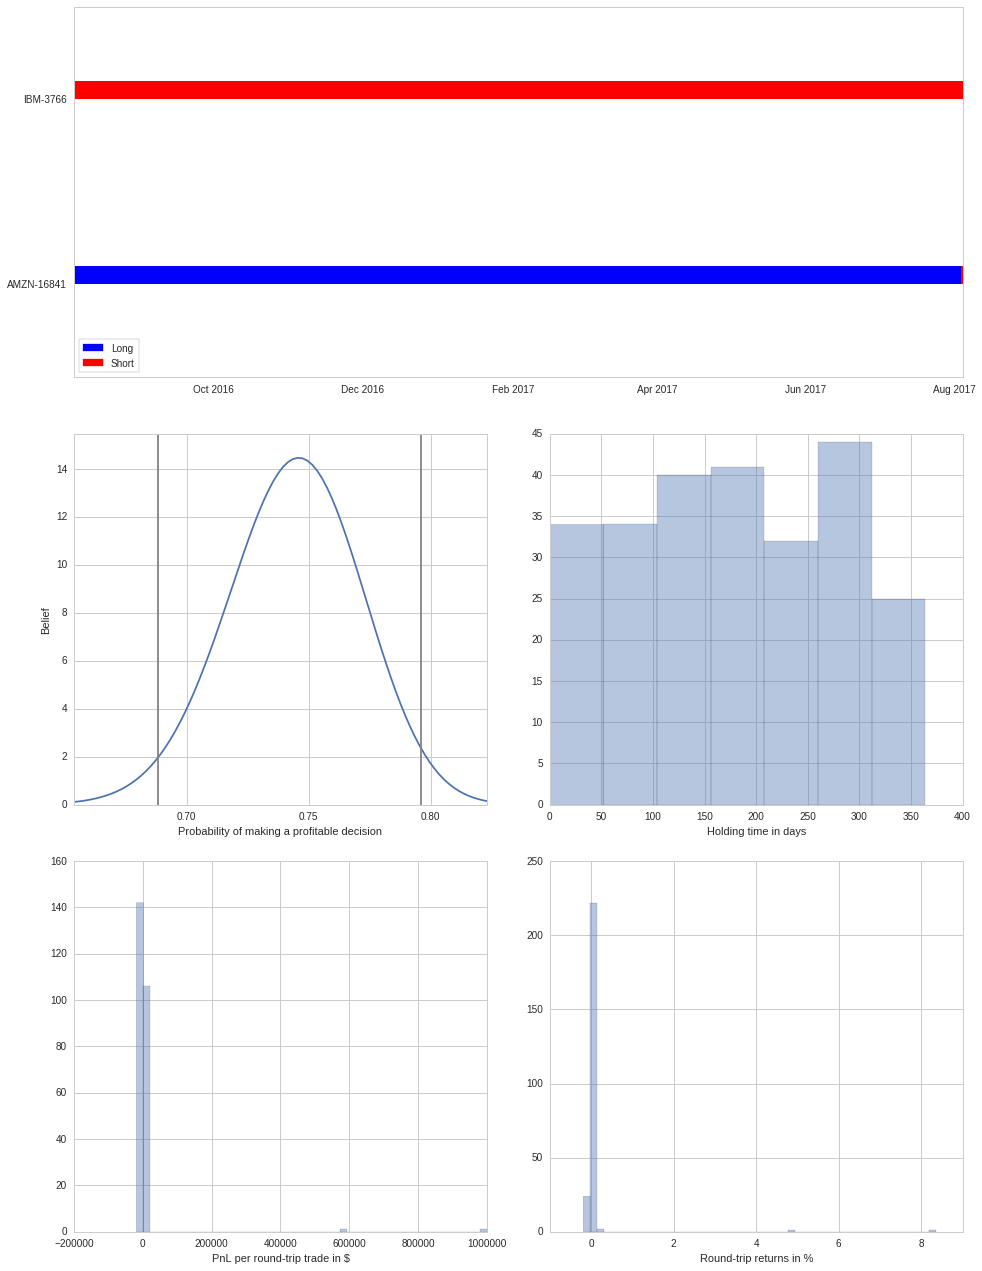

In [22]:
pf.create_round_trip_tear_sheet(bt_returns, bt_positions, bt_transactions);